In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from matplotlib import cm as cm
%matplotlib inline

# Data Exploration

This is the process of figure out the insight of the data according to its behavior. This will be good for data scientists to decide how to do with the data.

## Display Description

In [21]:
df = pd.read_csv("dataset.csv")
display(df.describe())

,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,1423.488372,-2424.418605,1114.883721,-81.724252,229.229236,626.928571,0.759136
std,12284.257994,18878.391826,6528.359106,381.156097,381.299286,502.897634,0.427963
min,-50820.000000,-88060.000000,-38780.000000,-1043.000000,-78.000000,-367.000000,0.000000
25%,-1050.000000,-2520.000000,-1050.000000,4.000000,-12.000000,23.000000,1.000000
50%,770.000000,-840.000000,280.000000,14.000000,-3.000000,992.000000,1.000000
75%,2520.000000,490.000000,2100.000000,20.000000,668.250000,998.000000,1.000000
max,56350.000000,108220.000000,48300.000000,1027.000000,1025.000000,1024.000000,1.000000


So, the total dataset is 602 rows, the data contain minus integers. The mean of label said the data unblaced which more like to has class1 more than class0. The min and max describe above.

## Plot bar

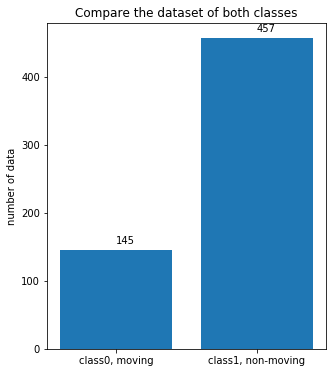

In [262]:
n_movin = (df["label"] == 0).sum()
n_idle = (df["label"] == 1).sum()
number = [n_movin, n_idle]

objects = ("class0, moving", "class1, non-moving")
y_pos = np.arange(len(objects))

plt.figure(figsize=(5, 6))
plt.bar(y_pos, number, align='center')
plt.xticks(y_pos, objects)
plt.ylabel("number of data")
plt.title("Compare the dataset of both classes")
for i in range(len(number)):
    plt.text(i, number[i]+10, str(number[i]))
plt.show()

The data is unbalanced since class1 has 457 and class0 has only 145 rows

## Plot boxplot

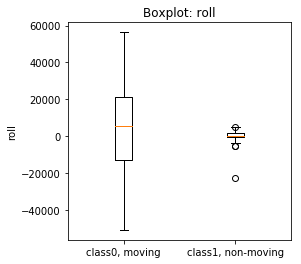

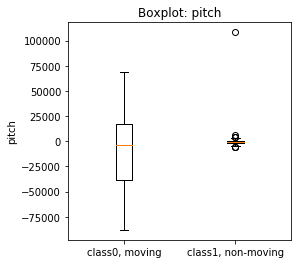

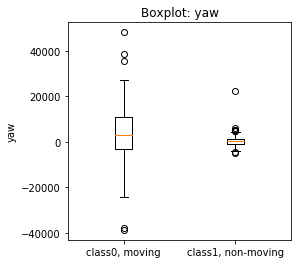

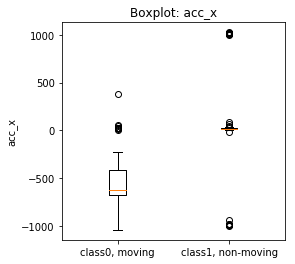

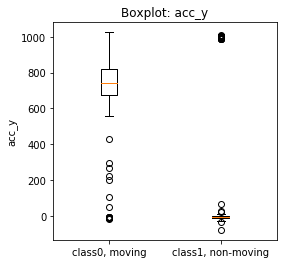

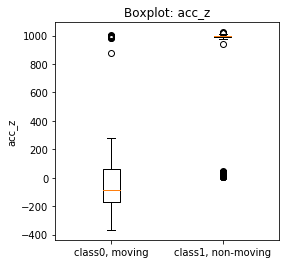

In [263]:
for col in df.columns[:-1]:
    size = 4
    fig1, ax1 = plt.subplots(figsize=(size, size))
    ax1.set_title("{}".format(col))
    data = [df[col].loc[df["label"] == 0], df[col].loc[df["label"] == 1]]
    ax1.boxplot(data)
    ax1.set_title("Boxplot: {}".format(col))
    plt.ylabel("{}".format(col))
    ax1.set_xticklabels(["class0, moving", "class1, non-moving"])
    plt.show()

These boxplots show the outlier of dataset and length of the value in each feature which is shown data is easy to distinguish from a different class.

## Plot correlation matrix

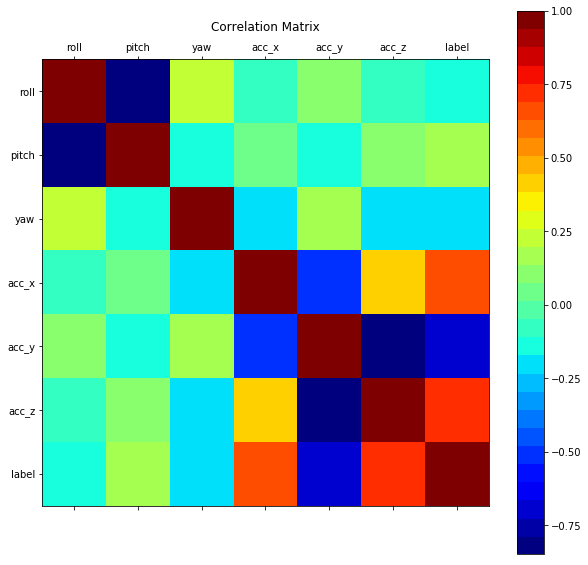

In [233]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    labels = df.columns
    ax.set_xticklabels(labels.insert(0, None),fontsize=10)
    ax.set_yticklabels(labels.insert(0, None),fontsize=10)
    cmap = cm.get_cmap('jet', 30)
    cax = ax.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    fig.colorbar(cax)
    plt.title("Correlation Matrix")
    plt.show()
    
plot_corr(df)

The correlation matrix indicates the relevance of each feature. 1 is more likely to be the same behavior. -1 is the absolute difference which is good in classification problems. So, we see that pitch and roll are contradictory. In contrast, acc_x and acc_z is the same behavior.

## plot scatter

In [267]:
def plot_scatter(col1, col2):
    feature_name1 = col1
    feature_name2 = col2
    rand_145 = np.random.randint(457, size=145)
    plt.scatter(df[feature_name1].loc[df["label"]==0].iloc[:145], df[feature_name2].loc[df["label"]==0].iloc[:145], alpha=0.5, label="moving")
    plt.scatter(df[feature_name1].loc[df["label"]==1].iloc[rand_145], df[feature_name2].loc[df["label"]==1].iloc[rand_145], alpha=0.5, label="non-moving")
    plt.legend()
    plt.xlabel("{}".format(col1))
    plt.ylabel("{}".format(col2))
    plt.title("Scatter plot: {} and {}".format(col1, col2))
    plt.show()

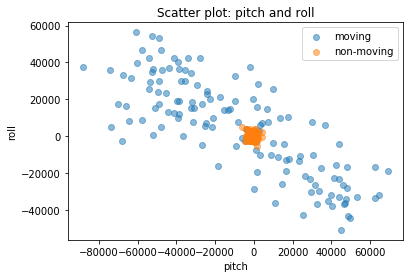

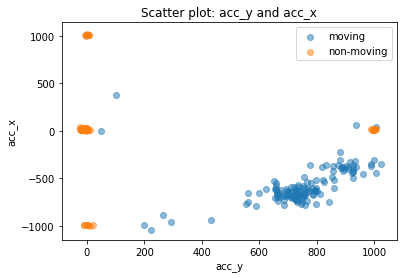

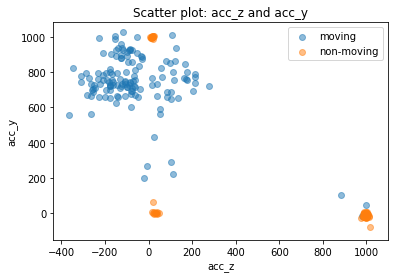

In [268]:
plot_scatter("pitch", "roll")
plot_scatter("acc_y", "acc_x")
plot_scatter("acc_z", "acc_y")

Theses the distribution of data in which we get a clue from the correlation matrix. pairs of acc_x and acc_y, acc_z and acc_y, pitch and roll can be considered a feature for classification problem.

## Plot line

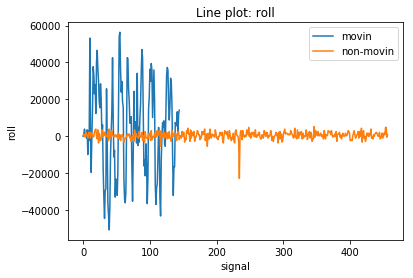

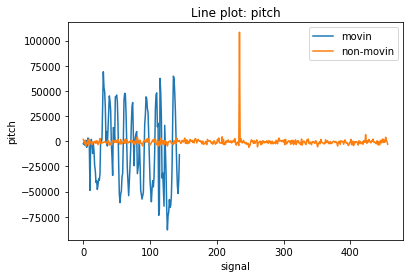

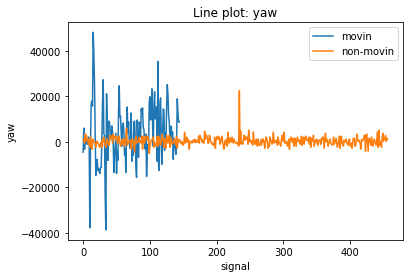

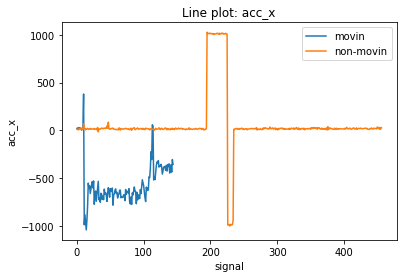

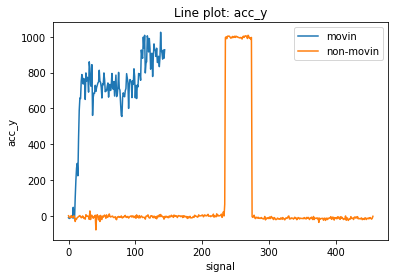

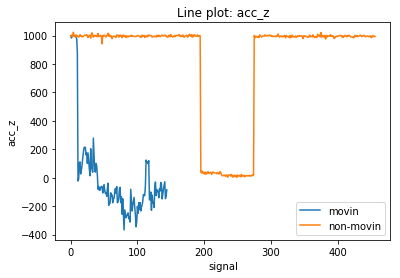

In [261]:
for col in df.columns[:-1]:
    a = df[col].loc[df["label"]==0]
    b = df[col].loc[df["label"]==1]
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(range(len(a)), a, label= "movin")
    ax.plot(range(len(b)), b, label= "non-movin")
    plt.legend()
    plt.ylabel("{}".format(col))
    plt.xlabel("signal")
    plt.title("Line plot: {}".format(col))
    plt.show()

So lastly, we consider data as the signal in the discrete-time domain in the next step we would like to applied FFT.